## Task 02 – AI Health Analyst: Heart Disease Prediction

Machine Learning can help in healthcare by predicting health risks early using patient data.In this project, I build a classification model to predict whether a person is likely to have heart disease based on medical attributes.
I will train a Logistic Regression model and also test a Decision Tree model for comparison.The performance will be checked using accuracy and confusion matrix.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print(df.shape)
df.info()

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df.isnull().sum()
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [6]:
X = df.drop("target", axis=1)
y = df["target"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
from sklearn.metrics import accuracy_score
log_pred = log_model.predict(X_test_scaled)

log_acc = accuracy_score(y_test, log_pred)
print( log_acc)

0.7631578947368421


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
log_cm = confusion_matrix(y_test, log_pred)
print("Confusion Matrix:\n", log_cm)
print("\nClassification Report:\n")
print(classification_report(y_test, log_pred))


Confusion Matrix:
 [[23 12]
 [ 6 35]]

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.66      0.72        35
           1       0.74      0.85      0.80        41

    accuracy                           0.76        76
   macro avg       0.77      0.76      0.76        76
weighted avg       0.77      0.76      0.76        76



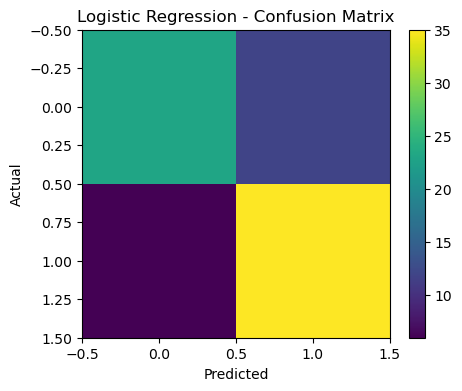

In [14]:
plt.figure(figsize=(5,4))
plt.imshow(log_cm)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

In [15]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
tree_pred = tree_model.predict(X_test)

tree_acc = accuracy_score(y_test, tree_pred)
print( tree_acc)

0.7236842105263158


In [18]:
print("Model Comparison:")
print("Logistic Regression Accuracy:", log_acc)
print("Decision Tree Accuracy:", tree_acc)

Model Comparison:
Logistic Regression Accuracy: 0.7631578947368421
Decision Tree Accuracy: 0.7236842105263158


## Conclusion

This project demonstrates how Machine Learning can support healthcare by predicting heart disease risk using classification algorithms. Logistic Regression performed well after feature scaling, and Decision Tree was also tested to compare performance.Evaluation using accuracy score, confusion matrix, and classification report helped understand how reliable the model is on unseen patient data.